<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/week11/neural_networks_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRTV6kfmSkZLO4vx8jtyQwSTey5RdOUR0IIzqZTHTexbFEQcZQy7_gKFPw9fxmMxUfoutVbsrH0X-Oj/pub?output=csv'
df = pd.read_csv(url, index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [ ]:
# Check for duplicates and missing values
print('Duplicated:', df.duplicated().sum())
print('Missing Values:', df.isna().sum().sum())

Duplicated: 12
Missing Values: 11


In [ ]:
# Drop the duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
# Drop the missing values
df.dropna(inplace = True)
df.isna().sum().sum()

0

In [ ]:
# Set the target and features
X = df.drop(columns = 'TARGET_5Yrs')
y = df['TARGET_5Yrs']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
# Get the number of features
input_shape = X_train.shape[1]
input_shape

19

In [ ]:
# Instantiate a model
model = Sequential()

In [ ]:
# Add hidden layers
model.add(Dense(19, input_dim = input_shape, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))

In [ ]:
# Add output layer
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Compile the model
model.compile(loss = 'bce', optimizer = 'adam')

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 10)

Epoch 1/10
31/31 [==============================] - 1s 9ms/step - loss: 0.7910 - val_loss: 0.7132
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 0.6725 - val_loss: 0.6456
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 0.6281 - val_loss: 0.6140
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 0.6060 - val_loss: 0.5944
Epoch 5/10
31/31 [==============================] - 0s 4ms/step - loss: 0.5914 - val_loss: 0.5836
Epoch 6/10
31/31 [==============================] - 0s 4ms/step - loss: 0.5834 - val_loss: 0.5764
Epoch 7/10
31/31 [==============================] - 0s 4ms/step - loss: 0.5780 - val_loss: 0.5717
Epoch 8/10
31/31 [==============================] - 0s 4ms/step - loss: 0.5739 - val_loss: 0.5683
Epoch 9/10
31/31 [==============================] - 0s 4ms/step - loss: 0.5706 - val_loss: 0.5652
Epoch 10/10
31/31 [==============================] - 0s 4ms/step - loss: 0.5679 - val_loss: 0.5629


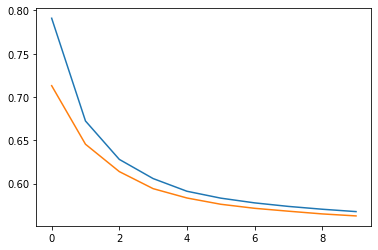

In [ ]:
# Visualize the loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')